In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler
pd.set_option("display.max_columns", None)

In [14]:
match = pd.read_csv("Database/team-FullMatchStats.csv")
match.head()

,playoffs,game,team_x,gamelength_x,result_x,kills_x,assists_x,doublekills_x,triplekills_x,quadrakills_x,pentakills_x,firstblood_x,team kpm_x,ckpm_x,firstdragon_x,dragons_x,elementaldrakes_x,infernals_x,mountains_x,clouds_x,oceans_x,elders_x,firstherald_x,heralds_x,firstbaron_x,barons_x,firsttower_x,towers_x,firstmidtower_x,firsttothreetowers_x,inhibitors_x,damagetochampions_x,dpm_x,damagetakenperminute_x,damagemitigatedperminute_x,wardsplaced_x,wpm_x,wardskilled_x,wcpm_x,controlwardsbought_x,visionscore_x,vspm_x,totalgold_x,earnedgold_x,earned gpm_x,goldspent_x,gspd_x,monsterkills_x,monsterkillsownjungle_x,monsterkillsenemyjungle_x,goldat10_x,xpat10_x,csat10_x,goldat15_x,xpat15_x,csat15_x,team_y,gamelength_y,kills_y,assists_y,doublekills_y,triplekills_y,quadrakills_y,pentakills_y,team kpm_y,ckpm_y,dragons_y,elementaldrakes_y,infernals_y,mountains_y,clouds_y,oceans_y,elders_y,heralds_y,barons_y,towers_y,inhibitors_y,damagetochampions_y,dpm_y,damagetakenperminute_y,damagemitigatedperminute_y,wardsplaced_y,wpm_y,wardskilled_y,wcpm_y,controlwardsbought_y,visionscore_y,vspm_y,totalgold_y,earnedgold_y,earned gpm_y,goldspent_y,gspd_y,monsterkills_y,monsterkillsownjungle_y,monsterkillsenemyjungle_y,goldat10_y,xpat10_y,csat10_y,goldat15_y,xpat15_y,csat15_y
0,0,1,LNG Esports,2142,0,6,12,0.0,0.0,0.0,0.0,1.0,0.1681,0.5322,1.0,2.0,2.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,3.0,1.0,1.0,0.0,66948,1875.2941,2603.8936,2756.7227,134,3.7535,81,2.2689,56,269.0,7.5350,55362,32136,900.1681,52675.0,-0.147855,191,144,4,14990.0,18271.0,335.0,23475.0,28650.0,533.0,Suning,2142,13,32,2.0,0.0,0.0,0.0,0.3641,0.5322,3.0,3.0,2.0,0.0,1.0,0.0,0.0,0.0,2.0,11.0,5.0,67812,1899.4958,2659.4398,2703.6695,176,4.9300,79,2.2129,57,385.0,10.7843,67056,43830,1227.7311,61085.0,0.147855,287,176,36,15455.0,19277.0,371.0,22973.0,29622.0,567.0
1,0,2,LNG Esports,1800,0,5,11,1.0,0.0,0.0,0.0,1.0,0.1667,0.6667,0.0,2.0,2.0,0.0,0.0,0.0,2.0,0.0,1.0,2.0,0.0,0.0,1.0,3.0,1.0,0.0,0.0,38629,1287.6333,3047.1667,2708.9000,114,3.8000,38,1.2667,35,224.0,7.4667,47152,27414,913.8000,43775.0,-0.142136,202,142,4,15157.0,19148.0,340.0,24206.0,30770.0,532.0,Suning,1800,15,33,1.0,1.0,0.0,0.0,0.5000,0.6667,3.0,3.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,8.0,1.0,66173,2205.7667,2235.0000,2445.9333,111,3.7000,47,1.5667,48,211.0,7.0333,55946,36208,1206.9333,50473.0,0.142136,218,151,15,15080.0,18796.0,337.0,24322.0,30943.0,556.0
2,0,1,Team WE,1923,1,16,38,1.0,1.0,0.0,0.0,1.0,0.4992,0.7488,0.0,3.0,3.0,3.0,0.0,0.0,0.0,0.0,1.0,2.0,1.0,1.0,1.0,10.0,1.0,1.0,2.0,65407,2040.7800,2816.3495,2915.4446,109,3.4009,73,2.2777,46,250.0,7.8003,60654,39661,1237.4727,55225.0,0.031545,236,139,34,14803.0,19178.0,326.0,25234.0,31362.0,536.0,Suning,1923,8,19,1.0,0.0,0.0,0.0,0.2496,0.7488,2.0,2.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,3.0,0.0,58087,1812.3869,2756.9735,2851.7941,142,4.4306,45,1.4041,50,280.0,8.7363,55554,34561,1078.3463,53510.0,-0.031545,213,135,33,15182.0,18331.0,335.0,23743.0,29787.0,560.0
3,0,2,Suning,1874,1,15,42,3.0,1.0,0.0,0.0,0.0,0.4803,0.7044,0.0,2.0,2.0,2.0,0.0,0.0,0.0,0.0,1.0,2.0,1.0,1.0,1.0,8.0,1.0,1.0,1.0,72351,2316.4674,2981.2380,2278.1430,119,3.8100,69,2.2092,41,253.0,8.1003,58947,38454,1231.1846,52150.0,0.093852,194,134,16,15500.0,18492.0,339.0,25514.0,30019.0,531.0,Team WE,1874,7,21,0.0,0.0,0.0,0.0,0.2241,0.7044,3.0,3.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,2.0,0.0,60311,1930.9819,3077.9936,2885.3148,118,3.7780,67,2.1451,41,245.0,7.8442,48511,28018,897.0544,47475.0,-0.093852,220,145,16,15186.0,18160.0,324.0,24351.0,28343.0,504.0
4,0,3,Team WE,2440,0,11,25,1.0,0.0,0.0,0.0,0.0,0.2705,0.8607,1.0,2.0,2.0,1.0,0.0,0.0,1.0,0.0,1.0,2.0,0.0,0.0,1.0,4.0,1.0,1.0,0.0,81694,2008.8689,3806.5574,4638.2213,126,3.0984,106,2.6066,51,307.0,7.5492,69083,42817,1052.8770,70235.0,0.014846,246,179,7,15181.0,19035.0,359.0,25649.0,30511.0,563.0,Suning,2440,24,57,3.0,0.0,0.0,0.0,0.5902,0.8607,4.0,4.0,0.0,1.0,0.0,3.0,0.0,0.0,2.0,11.0,4.0,127443,3133.8443,3101.5820,3393.4426,206,5.0656,63,1.5492,49,417.0,10.2541,77305,51039,1255.0574,69200.0,-0.014846,32

In [15]:
shuffled = match.sample(frac=1)

In [16]:
test = pd.read_csv("Database/teamTestNovo.csv")
test.head()

,playoffs,game,team_x,gamelength,result,kills,deaths,assists,doublekills,triplekills,quadrakills,pentakills,firstblood,team kpm,ckpm,firstdragon,dragons,elementaldrakes,infernals,mountains,clouds,oceans,elders,firstherald,heralds,firstbaron,barons,firsttower,towers,firstmidtower,firsttothreetowers,inhibitors,damagetochampions,dpm,damagetakenperminute,damagemitigatedperminute,wardsplaced,wpm,wardskilled,wcpm,controlwardsbought,visionscore,vspm,totalgold,earnedgold,earned gpm,goldspent,gspd,monsterkills,monsterkillsownjungle,monsterkillsenemyjungle,golddiffat10,xpdiffat10,csdiffat10,golddiffat15,xpdiffat15,csdiffat15,team_y
0,1,4,DAMWON Gaming,-54.061884,1,-0.331863,-2.638038,-1.206149,0.121692,0.081344,0.029580,0.009860,0.010898,0.009492,-0.067849,0.074728,0.301764,0.446809,0.129898,0.051667,0.090328,0.052964,-0.023093,0.142190,0.142060,0.049429,0.051894,0.050078,0.839128,0.161910,0.095615,0.067333,-4122.953944,-51.516503,-104.234986,-251.924803,-2.152698,0.017978,6.298910,0.227406,1.211339,5.626103,0.368934,877.085496,1428.498832,81.721004,552.337701,0.048346,5.133498,0.309289,0.350675,98.358978,18.128438,4.324079,519.100804,218.641282,7.382590,Suning
1,1,3,Suning,54.061884,0,0.331863,2.638038,1.206149,-0.121692,-0.081344,-0.029580,-0.009860,-0.010898,-0.009492,0.067849,-0.074728,-0.301764,-0.446809,-0.129898,-0.051667,-0.090328,-0.052964,0.023093,-0.142190,-0.142060,-0.049429,-0.051894,-0.050078,-0.839128,-0.161910,-0.095615,-0.067333,4122.953944,51.516503,104.234986,251.924803,2.152698,-0.017978,-6.298910,-0.227406,-1.211339,-5.626103,-0.368934,-877.085496,-1428.498832,-81.721004,-552.337701,-0.048346,-5.133498,-0.309289,-0.350675,-98.358978,-18.128438,-4.324079,-519.100804,-218.641282,-7.382590,DAMWON Gaming
2,1,2,DAMWON Gaming,-54.061884,0,-0.331863,-2.638038,-1.206149,0.121692,0.081344,0.029580,0.009860,0.010898,0.009492,-0.067849,0.074728,0.301764,0.446809,0.129898,0.051667,0.090328,0.052964,-0.023093,0.142190,0.142060,0.049429,0.051894,0.050078,0.839128,0.161910,0.095615,0.067333,-4122.953944,-51.516503,-104.234986,-251.924803,-2.152698,0.017978,6.298910,0.227406,1.211339,5.626103,0.368934,877.085496,1428.498832,81.721004,552.337701,0.048346,5.133498,0.309289,0.350675,98.358978,18.128438,4.324079,519.100804,218.641282,7.382590,Suning
3,1,1,DAMWON Gaming,-54.061884,1,-0.331863,-2.638038,-1.206149,0.121692,0.081344,0.029580,0.009860,0.010898,0.009492,-0.067849,0.074728,0.301764,0.446809,0.129898,0.051667,0.090328,0.052964,-0.023093,0.142190,0.142060,0.049429,0.051894,0.050078,0.839128,0.161910,0.095615,0.067333,-4122.953944,-51.516503,-104.234986,-251.924803,-2.152698,0.017978,6.298910,0.227406,1.211339,5.626103,0.368934,877.085496,1428.498832,81.721004,552.337701,0.048346,5.133498,0.309289,0.350675,98.358978,18.128438,4.324079,519.100804,218.641282,7.382590,Suning
4,1,4,Suning,93.898645,1,-1.100407,1.959079,-1.449051,-0.175474,-0.089973,-0.015041,0.000542,-0.074255,-0.057696,-0.005897,-0.140921,-0.230488,-0.266667,-0.037669,-0.133198,-0.108266,0.028862,0.025339,-0.124932,-0.132249,-0.056640,-0.106504,-0.058943,-0.978726,-0.123848,-0.035095,-0.113550,2391.547561,-22.227437,155.498227,271.627010,21.410027,0.479499,2.114092,0.003273,4.513957,21.639973,0.297320,1086.016396,128.278591,-56.558228,1053.379675,-0.051522,5.734824,7.327236,0.522493,-158.520325,-47.533875,-5.794173,-735.497967,-346.931707,-8.527507,Top Esports


In [17]:
#Dropa coluna dos nomes do time
shuffled.drop(['team_x', 'team_y'], axis=1, inplace=True)
test.drop(['team_x', 'team_y', 'gamelength'], axis=1, inplace=True)

shuffled = pd.get_dummies(shuffled, columns=['game'], prefix='game')
test = pd.get_dummies(test, columns=['game'], prefix='game')

In [7]:
train_y = shuffled['result_x']
train_X = shuffled.drop(['result_x'], axis=1)

test_y = test['result_x']
test_X = test.drop(['result_x'], axis=1)

scaler = StandardScaler()
X_train_scaled = scaler.fit(train_X).transform(train_X)
X_test_scaled = scaler.transform(test_X)

In [8]:
#PCA
pca = PCA(n_components=50)
principalComponents = pca.fit_transform(X_train_scaled)
pca_test = pca.transform(X_test_scaled)

In [9]:
def plot(acc_train, acc_test, range_, title):
    fig, ax = plt.subplots(figsize=(9, 6))
    ax.set_ylim([0,1.05])
    ax.plot(range_,acc_train,'-', label = 'Treino')
    ax.plot(range_,acc_test,'-', label = 'Teste')
    
    ax.set_xlabel('alpha=log(x)',fontsize='large') 
    ax.set_ylabel('Accuracy',fontsize='large') 
    ax.set_title(title) 
    ax.legend(fontsize='large')
    
    plt.show()

### Linear Regression com Cross Validation

In [9]:
reg = LinearRegression().fit(principalComponents, train_y)
reg.score(principalComponents, train_y)

0.9074661520845606

In [11]:
reg.score(pca_test, test_y)

-0.08016379489161118

In [12]:
ypred = reg.predict(pca_test)
scaler = MinMaxScaler(feature_range=(0, 1),copy=True)
ypred_std = scaler.fit(ypred.reshape(-1, 1)).transform(ypred.reshape(-1, 1))
ypred

array([0.40119749, 0.60973328, 0.34560996, 0.57964888, 0.5858519 ,
       0.36337826, 0.53026437, 0.33329385, 0.44703649, 0.49828834,
       0.49444985, 0.42365498, 0.41885577, 0.59828238, 0.57203647,
       0.56819798, 0.57515491, 0.5458133 , 0.37508814, 0.37124965,
       0.36257374, 0.33632783, 0.54476983, 0.41367832, 0.63733212,
       0.59699394, 0.3349045 , 0.5603963 , 0.55084099, 0.55349635,
       0.46393434, 0.53755842, 0.46104217, 0.42161008, 0.47511841,
       0.41039672, 0.48162219, 0.54687383, 0.59080099, 0.43271223,
       0.34696473, 0.43720757, 0.43720757, 0.5512677 , 0.42312872,
       0.52176689, 0.48337796, 0.50397217, 0.56580644, 0.43279415])

In [13]:
compare = pd.DataFrame({'Actual': test_y, 'Predicted': ypred_std.flatten()})
compare

,Actual,Predicted
0,1,0.223339
1,0,0.909226
2,0,0.040508
3,0,0.810276
4,1,0.830678
5,0,0.098949
6,0,0.647848
7,0,0.000000
8,1,0.374106
9,0,0.542677


In [10]:
def aproximacao(y, pred):
    for p in range(0, len(pred)):
        if pred[p] > 0.5:
            pred[p] = 1
        else:
            pred[p] = 0

    compare = pd.DataFrame({'Actual': y, 'Predicted': pred.flatten()})
    acc = compare['Actual'] == compare['Predicted']
    acc = acc.values.sum()/len(pred)
    #plt.xlabel('alpha=log(x)')
    #plt.ylabel('Accuracy')
    #plt.title('Logistic Regression Path')
    
    return acc

0.48

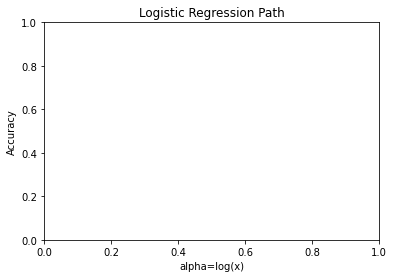

In [15]:
aproximacao(test_y, ypred_std)

In [16]:
mean_absolute_error(test_y, ypred_std)

0.52

### Ridge Regression

In [17]:
ridge_train = []
ridge_test = []
for penalty in np.logspace(-0.5, 2, num=15):
    print("-----------------------l2 = %f --------------------" % (penalty))
    ridge = Ridge(alpha=penalty, normalize=True)
    ridge.fit(train_X, train_y)
    
    scoresRidge = cross_val_score(ridge, train_X, train_y, cv=10)
    ridge_train.append(scoresRidge.mean())
    
    print("Score cross-validation: %0.2f (+/- %0.2f)" % (scoresRidge.mean(), scoresRidge.std() * 2))
    print("Score test : %0.2f" % (ridge.score(X_test_scaled, test_y)))
    ypred_ridge = ridge.predict(X_test_scaled)
    print("Estimativas: %0.2f (+/- %0.2f)" % (ypred_ridge.mean(), ypred_ridge.std() * 2))
    print("Absolute Error: %f " % (np.sum(abs(test_y - ypred_ridge))))
    print("Mean absolute error: %0.2f" % (mean_absolute_error(test_y, ypred_ridge)))
    ridge_test.append(1-mean_absolute_error(test_y, ypred_ridge))

-----------------------l2 = 0.316228 --------------------
Score cross-validation: 0.88 (+/- 0.06)
Score test : -0.37
Estimativas: 0.64 (+/- 0.12)
Absolute Error: 27.053896 
Mean absolute error: 0.54
-----------------------l2 = 0.477058 --------------------
Score cross-validation: 0.87 (+/- 0.07)
Score test : -0.21
Estimativas: 0.58 (+/- 0.08)
Absolute Error: 26.051743 
Mean absolute error: 0.52
-----------------------l2 = 0.719686 --------------------
Score cross-validation: 0.86 (+/- 0.07)
Score test : -0.11
Estimativas: 0.52 (+/- 0.09)
Absolute Error: 25.128134 
Mean absolute error: 0.50
-----------------------l2 = 1.085711 --------------------
Score cross-validation: 0.85 (+/- 0.07)
Score test : -0.05
Estimativas: 0.48 (+/- 0.12)
Absolute Error: 24.353135 
Mean absolute error: 0.49
-----------------------l2 = 1.637894 --------------------
Score cross-validation: 0.84 (+/- 0.07)
Score test : -0.02
Estimativas: 0.44 (+/- 0.15)
Absolute Error: 23.785982 
Mean absolute error: 0.48
-----

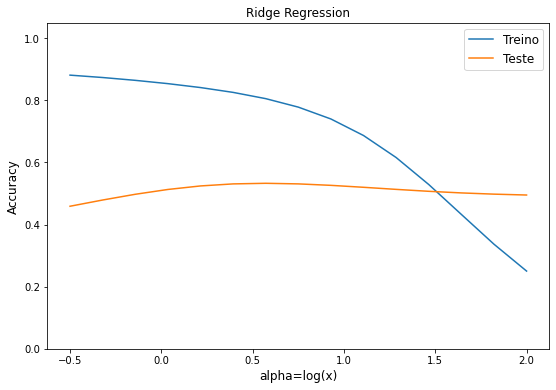

In [19]:
plot(ridge_train, ridge_test, np.linspace(-0.5, 2, num=15), 'Ridge Regression')

In [20]:
#Com PCA
for penalty in np.logspace(-0.5, 2, num=15):
    print("-----------------------l2 = %f --------------------" % (penalty))
    ridge = Ridge(alpha=penalty)
    ridge.fit(principalComponents, train_y)
    
    scoresRidge = cross_val_score(ridge, principalComponents, train_y, cv=10)
    
    print("Score cross-validation: %0.2f (+/- %0.2f)" % (scoresRidge.mean(), scoresRidge.std() * 2))
    print("Score test : %0.2f" % (ridge.score(pca_test, test_y)))
    ypred_ridge_pca = ridge.predict(pca_test)
    print("Estimativas: %0.2f (+/- %0.2f)" % (ypred_ridge_pca.mean(), ypred_ridge_pca.std() * 2))
    print("Absolute Error: %f " % (np.sum(abs(test_y - ypred_ridge_pca))))    
    print("Mean absolute error: %0.2f" % (mean_absolute_error(test_y, ypred_ridge_pca)))

-----------------------l2 = 0.316228 --------------------
Score cross-validation: 0.88 (+/- 0.06)
Score test : -0.08
Estimativas: 0.48 (+/- 0.17)
Absolute Error: 24.558914 
Mean absolute error: 0.49
-----------------------l2 = 0.477058 --------------------
Score cross-validation: 0.88 (+/- 0.06)
Score test : -0.08
Estimativas: 0.48 (+/- 0.17)
Absolute Error: 24.559100 
Mean absolute error: 0.49
-----------------------l2 = 0.719686 --------------------
Score cross-validation: 0.88 (+/- 0.06)
Score test : -0.08
Estimativas: 0.48 (+/- 0.17)
Absolute Error: 24.559381 
Mean absolute error: 0.49
-----------------------l2 = 1.085711 --------------------
Score cross-validation: 0.88 (+/- 0.06)
Score test : -0.08
Estimativas: 0.48 (+/- 0.17)
Absolute Error: 24.559805 
Mean absolute error: 0.49
-----------------------l2 = 1.637894 --------------------
Score cross-validation: 0.88 (+/- 0.06)
Score test : -0.08
Estimativas: 0.48 (+/- 0.17)
Absolute Error: 24.560443 
Mean absolute error: 0.49
-----

### Lasso

In [21]:
for l1_penalty in np.logspace(-5, -2, num=15):
    print("-----------------------l2 = %f --------------------" % (l1_penalty))
    model = Lasso(alpha=l1_penalty, normalize=True)
    model.fit(train_X, train_y)
    modelCV = cross_val_score(model, train_X, train_y, cv=10)
    
    print("Score cross-validation: %0.2f (+/- %0.2f)" % (modelCV.mean(), modelCV.std() * 2))
    print("Score test : %0.2f" % (model.score(X_test_scaled, test_y)))
    ypred_lasso = model.predict(X_test_scaled)
    print("Estimativas: %0.2f (+/- %0.2f)" % (ypred_lasso.mean(), ypred_lasso.std() * 2))
    print("Absolute Error: %f " % (np.sum(abs(test_y - ypred_lasso))))        
    print("Mean absolute error: %0.2f" % (mean_absolute_error(test_y, ypred_lasso)))

-----------------------l2 = 0.000010 --------------------


D:\Dudu\Documents\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.4600238766212499, tolerance: 0.013073954372623587
  positive)
D:\Dudu\Documents\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.2673037355906276, tolerance: 0.01176744186046511
  positive)
D:\Dudu\Documents\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.49569186939000076, tolerance: 0.01171797040169135
  positive)
D:\Dudu\Documents\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of it

Score cross-validation: 0.90 (+/- 0.06)
Score test : -4.31
Estimativas: 1.30 (+/- 0.58)
Absolute Error: 47.244178 
Mean absolute error: 0.94
-----------------------l2 = 0.000016 --------------------


D:\Dudu\Documents\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.04675692400024367, tolerance: 0.013073954372623587
  positive)
D:\Dudu\Documents\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.05701513829323446, tolerance: 0.01176744186046511
  positive)
D:\Dudu\Documents\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.08281293087688368, tolerance: 0.01171797040169135
  positive)
D:\Dudu\Documents\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of 

Score cross-validation: 0.90 (+/- 0.06)
Score test : -4.79
Estimativas: 1.36 (+/- 0.59)
Absolute Error: 49.770739 
Mean absolute error: 1.00
-----------------------l2 = 0.000027 --------------------


D:\Dudu\Documents\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.018247073478526943, tolerance: 0.013073954372623587
  positive)
D:\Dudu\Documents\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.020365389576411985, tolerance: 0.01176744186046511
  positive)
D:\Dudu\Documents\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.01726869461852676, tolerance: 0.01171797040169135
  positive)
D:\Dudu\Documents\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number o

Score cross-validation: 0.90 (+/- 0.06)
Score test : -3.87
Estimativas: 1.24 (+/- 0.59)
Absolute Error: 44.579029 
Mean absolute error: 0.89
-----------------------l2 = 0.000044 --------------------
Score cross-validation: 0.90 (+/- 0.06)
Score test : -3.15
Estimativas: 1.14 (+/- 0.59)
Absolute Error: 40.746707 
Mean absolute error: 0.81
-----------------------l2 = 0.000072 --------------------
Score cross-validation: 0.91 (+/- 0.06)
Score test : -2.82
Estimativas: 1.09 (+/- 0.58)
Absolute Error: 39.113632 
Mean absolute error: 0.78
-----------------------l2 = 0.000118 --------------------
Score cross-validation: 0.91 (+/- 0.06)
Score test : -2.55
Estimativas: 1.05 (+/- 0.55)
Absolute Error: 37.851175 
Mean absolute error: 0.76
-----------------------l2 = 0.000193 --------------------
Score cross-validation: 0.90 (+/- 0.05)
Score test : -1.82
Estimativas: 0.94 (+/- 0.46)
Absolute Error: 34.519511 
Mean absolute error: 0.69
-----------------------l2 = 0.000316 --------------------
Score

### Logistic Regression

In [12]:
rog_train = []
rog_test = []
for penalty in np.logspace(-2, 5, num=15):
    print("-----------------------l2 = %f --------------------" % (penalty))
    logReg = LogisticRegression(C=penalty, max_iter=100).fit(X_train_scaled, train_y)
    scores = cross_val_score(logReg, X_train_scaled, train_y, cv=10)
    rog_train.append(scores.mean())
    print("Score cross-validation: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
    print("Score test : %0.2f" % (logReg.score(X_test_scaled, test_y)))
    rog_test.append(logReg.score(X_test_scaled, test_y))

-----------------------l2 = 0.010000 --------------------
Score cross-validation: 0.98 (+/- 0.04)
Score test : 0.48
-----------------------l2 = 0.031623 --------------------
Score cross-validation: 0.99 (+/- 0.03)
Score test : 0.50
-----------------------l2 = 0.100000 --------------------
Score cross-validation: 0.99 (+/- 0.03)
Score test : 0.50
-----------------------l2 = 0.316228 --------------------
Score cross-validation: 0.99 (+/- 0.03)
Score test : 0.50
-----------------------l2 = 1.000000 --------------------
Score cross-validation: 0.99 (+/- 0.03)
Score test : 0.50
-----------------------l2 = 3.162278 --------------------
Score cross-validation: 0.99 (+/- 0.03)
Score test : 0.50
-----------------------l2 = 10.000000 --------------------
Score cross-validation: 0.99 (+/- 0.03)
Score test : 0.50
-----------------------l2 = 31.622777 --------------------
Score cross-validation: 0.99 (+/- 0.03)
Score test : 0.52
-----------------------l2 = 100.000000 --------------------
Score cros

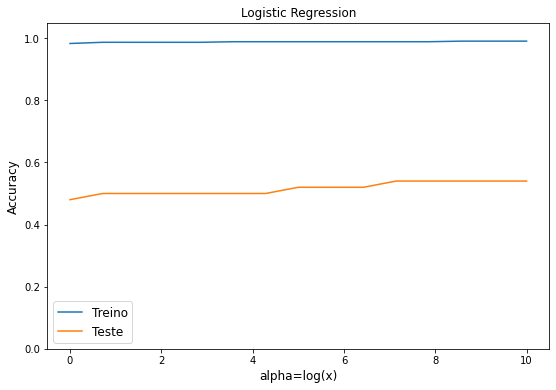

In [13]:
plot(rog_train, rog_test, np.linspace(0, 10, num=15), 'Logistic Regression')

In [14]:
#com PCA
for penalty in np.logspace(-5, 0, num=15):
    print("-----------------------l2 = %f --------------------" % (penalty))
    logReg = LogisticRegression(C=penalty, max_iter=100).fit(principalComponents, train_y)
    scores = cross_val_score(logReg, principalComponents, train_y, cv=10)
    
    print("Score cross-validation: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
    print("Score test : %0.2f" % (logReg.score(pca_test, test_y)))

-----------------------l2 = 0.000010 --------------------
Score cross-validation: 0.54 (+/- 0.01)
Score test : 0.36
-----------------------l2 = 0.000023 --------------------
Score cross-validation: 0.59 (+/- 0.06)
Score test : 0.36
-----------------------l2 = 0.000052 --------------------
Score cross-validation: 0.85 (+/- 0.08)
Score test : 0.36
-----------------------l2 = 0.000118 --------------------
Score cross-validation: 0.94 (+/- 0.09)
Score test : 0.44
-----------------------l2 = 0.000268 --------------------
Score cross-validation: 0.96 (+/- 0.06)
Score test : 0.54
-----------------------l2 = 0.000611 --------------------
Score cross-validation: 0.96 (+/- 0.05)
Score test : 0.52
-----------------------l2 = 0.001389 --------------------
Score cross-validation: 0.97 (+/- 0.05)
Score test : 0.52
-----------------------l2 = 0.003162 --------------------
Score cross-validation: 0.98 (+/- 0.04)
Score test : 0.48
-----------------------l2 = 0.007197 --------------------
Score cross-va

In [28]:
logReg.score(pca_test, test_y)

0.52

### -------------------------- Using Diff Dataset ----------------------------------------

In [18]:
diff = pd.read_csv("Database/teamData_diff.csv")
diff.head()

,gameid,playoffs,game,team_x,gamelength,result,kills,deaths,assists,doublekills,triplekills,quadrakills,pentakills,firstblood,team kpm,ckpm,firstdragon,dragons,elementaldrakes,infernals,mountains,clouds,oceans,elders,firstherald,heralds,firstbaron,barons,firsttower,towers,firstmidtower,firsttothreetowers,inhibitors,damagetochampions,dpm,damagetakenperminute,damagemitigatedperminute,wardsplaced,wpm,wardskilled,wcpm,controlwardsbought,visionscore,vspm,totalgold,earnedgold,earned gpm,goldspent,gspd,monsterkills,monsterkillsownjungle,monsterkillsenemyjungle,golddiffat10,xpdiffat10,csdiffat10,golddiffat15,xpdiffat15,csdiffat15,team_y
0,4268-5346,0,1,Invictus Gaming,2121,1,7,-7,27,3.0,1.0,0.0,0.0,1.0,0.1980,0.0,0.0,-2.0,-2.0,0.0,0.0,-2.0,0.0,0.0,0.0,-1.0,1.0,1.0,1.0,5.0,1.0,1.0,3.0,20189,571.1173,-450.1839,-1790.2405,2,0.0566,7,0.1980,-6,17.0,0.4809,7696,7696,217.7086,2715.0,0.090700,35,17,9,1987.0,1286.0,48.0,1112.0,45.0,36.0,Top Esports
1,4268-5347,0,2,Top Esports,1895,0,-9,9,-30,1.0,-1.0,0.0,0.0,1.0,-0.2849,0.0,1.0,-1.0,-1.0,0.0,0.0,0.0,-1.0,0.0,1.0,1.0,0.0,-1.0,1.0,-5.0,1.0,1.0,-2.0,3507,111.0396,-560.4539,-277.8365,-10,-0.3166,9,0.2849,-7,18.0,0.5699,-7182,-7182,-227.3984,-509.0,-0.019992,1,-6,0,-171.0,-477.0,-27.0,-524.0,-1439.0,-23.0,Invictus Gaming
2,4271-5352,0,1,Bilibili Gaming,1860,1,14,-14,30,3.0,2.0,0.0,0.0,1.0,0.4516,0.0,1.0,2.0,2.0,0.0,0.0,0.0,2.0,0.0,0.0,-1.0,1.0,1.0,1.0,10.0,1.0,1.0,3.0,7471,241.0000,150.8710,-150.9678,11,0.3549,7,0.2258,16,58.0,1.8710,14527,14527,468.6130,8925.0,0.377478,92,5,40,919.0,1078.0,20.0,1770.0,1787.0,51.0,LGD Gaming
3,4271-5353,0,2,LGD Gaming,2071,0,-7,7,-23,-1.0,0.0,0.0,0.0,1.0,-0.2028,0.0,1.0,1.0,1.0,0.0,0.0,2.0,-1.0,0.0,0.0,-1.0,0.0,-1.0,0.0,-9.0,0.0,0.0,-2.0,-24905,-721.5355,593.7422,-346.6151,-47,-1.3617,3,0.0869,-19,-91.0,-2.6365,-11025,-11025,-319.4109,-4895.0,-0.173857,-88,-18,-30,-1421.0,-1166.0,-51.0,-2512.0,-66.0,-34.0,Bilibili Gaming
4,4272-5354,0,1,Vici Gaming,2100,1,19,-19,67,6.0,0.0,0.0,0.0,1.0,0.5428,0.0,1.0,4.0,4.0,2.0,0.0,0.0,2.0,0.0,0.0,-1.0,1.0,2.0,1.0,8.0,1.0,1.0,1.0,13571,387.7428,32.1715,-393.1714,-27,-0.7714,43,1.2285,10,93.0,2.6571,13369,13369,381.9714,12105.0,0.420842,39,2,20,-80.0,-465.0,-39.0,1135.0,1028.0,-37.0,Suning


In [19]:
#Dropa coluna dos nomes do time e gameid
diff.drop(['team_x', 'team_y', 'gameid', 'gamelength'], axis=1, inplace=True)

#Codifica coluna 'game'
diff = pd.get_dummies(diff, columns=['game'], prefix='game')

#Separa label e data
y = diff['result']
X = diff.drop(['result'], axis=1)

#Separa teste e treino
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#Normaliza os dados
scaler = StandardScaler()
X_scaled = scaler.fit(X).transform(X)
X_train_scaled = scaler.fit(X_train).transform(X_train)
X_test_scaled = scaler.transform(X_test)

worlds_y = test['result']
worlds_X = test.drop(['result'], axis=1)
X_worlds_scaled = scaler.transform(worlds_X)

In [20]:
reg = LinearRegression().fit(X_scaled, y)
reg.score(X_worlds_scaled, worlds_y)

-1.3702739494990993e+19

In [28]:
pd.set_option("display.max_rows", 581)
y_pred = reg.predict(X_worlds_scaled)
scaler = MinMaxScaler(feature_range=(0, 1),copy=True)
y_pred_std = scaler.fit(y_pred.reshape(-1, 1)).transform(y_pred.reshape(-1, 1))
compare = pd.DataFrame({'Actual': worlds_y, 'Predicted': y_pred_std.flatten()})
print("Absolute Error: %f " % (np.sum(abs(worlds_y - y_pred_std.flatten()))))

Absolute Error: 36.480170 


,Actual,Predicted
0,1,0.027489
1,0,0.500806
2,0,0.002528
3,1,0.187537
4,1,0.025656
5,0,0.502639
6,0,0.000695
7,0,0.183224
8,1,0.039197
9,0,0.489097


## Ridge Regression

In [128]:
ridge_train = []
ridge_test = []
for penalty in np.logspace(-0.5, 2, num=15):
    print("-----------------------l2 = %f --------------------" % (penalty))
    ridge = Ridge(alpha=penalty, normalize=True)
    ridge.fit(X, y)
    
    scoresRidge = cross_val_score(ridge, X, y, cv=10)
    ridge_train.append(scoresRidge.mean())
    
    print("Score cross-validation: %0.2f (+/- %0.2f)" % (scoresRidge.mean(), scoresRidge.std() * 2))
    print("Score test : %0.2f" % (ridge.score(worlds_X, worlds_y)))
    ypred_ridge = ridge.predict(worlds_X)
    print("Estimativas: %0.2f (+/- %0.2f)" % (ypred_ridge.mean(), ypred_ridge.std() * 2))
    print("Absolute Error: %f " % (np.sum(abs(worlds_y - ypred_ridge))))
    print("Mean absolute error: %0.2f" % (mean_absolute_error(worlds_y, ypred_ridge)))
    ridge_test.append(1-mean_absolute_error(worlds_y, ypred_ridge))

-----------------------l2 = 0.316228 --------------------
Score cross-validation: 0.89 (+/- 0.04)
Score test : -0.02
Estimativas: 0.50 (+/- 0.11)
Absolute Error: 37.876528 
Mean absolute error: 0.50
-----------------------l2 = 0.477058 --------------------
Score cross-validation: 0.88 (+/- 0.04)
Score test : -0.02
Estimativas: 0.50 (+/- 0.11)
Absolute Error: 37.848723 
Mean absolute error: 0.50
-----------------------l2 = 0.719686 --------------------
Score cross-validation: 0.87 (+/- 0.04)
Score test : -0.01
Estimativas: 0.49 (+/- 0.11)
Absolute Error: 37.807186 
Mean absolute error: 0.50
-----------------------l2 = 1.085711 --------------------
Score cross-validation: 0.86 (+/- 0.05)
Score test : -0.01
Estimativas: 0.49 (+/- 0.11)
Absolute Error: 37.753442 
Mean absolute error: 0.50
-----------------------l2 = 1.637894 --------------------
Score cross-validation: 0.84 (+/- 0.05)
Score test : -0.01
Estimativas: 0.48 (+/- 0.11)
Absolute Error: 37.694746 
Mean absolute error: 0.50
-----

## Logistic Regression

In [129]:
rog_train = []
rog_test = []
for penalty in np.logspace(-2, 5, num=15):
    print("-----------------------l2 = %f --------------------" % (penalty))
    logReg = LogisticRegression(C=penalty, max_iter=100).fit(X_train_scaled, y_train)
    scores = cross_val_score(logReg, X_train_scaled, y_train, cv=10)
    rog_train.append(scores.mean())
    print("Score cross-validation: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
    print("Score test : %0.2f" % (logReg.score(X_worlds_scaled, worlds_y)))
    rog_test.append(logReg.score(X_worlds_scaled, worlds_y))

-----------------------l2 = 0.010000 --------------------


NameError: name 'X_train_scaled' is not defined

## Lasso

In [130]:
for l1_penalty in np.logspace(-5, -2, num=15):
    print("-----------------------l2 = %f --------------------" % (l1_penalty))
    model = Lasso(alpha=l1_penalty, normalize=True)
    model.fit(X_train, y_train)
    modelCV = cross_val_score(model, X_train, y_train, cv=10)
    
    print("Score cross-validation: %0.2f (+/- %0.2f)" % (modelCV.mean(), modelCV.std() * 2))
    print("Score test : %0.2f" % (model.score(worlds_X, worlds_y)))
    ypred_lasso = model.predict(worlds_X)
    print("Estimativas: %0.2f (+/- %0.2f)" % (ypred_lasso.mean(), ypred_lasso.std() * 2))
    print("Absolute Error: %f " % (np.sum(abs(worlds_y - ypred_lasso))))        
    print("Mean absolute error: %0.2f" % (mean_absolute_error(worlds_y, ypred_lasso)))

-----------------------l2 = 0.000010 --------------------
Score cross-validation: 0.92 (+/- 0.02)
Score test : -0.06
Estimativas: 0.54 (+/- 0.11)
Absolute Error: 38.515495 
Mean absolute error: 0.51
-----------------------l2 = 0.000016 --------------------
Score cross-validation: 0.92 (+/- 0.02)
Score test : -0.05
Estimativas: 0.54 (+/- 0.11)
Absolute Error: 38.430210 
Mean absolute error: 0.51
-----------------------l2 = 0.000027 --------------------
Score cross-validation: 0.92 (+/- 0.02)
Score test : -0.05
Estimativas: 0.54 (+/- 0.11)
Absolute Error: 38.356981 
Mean absolute error: 0.50
-----------------------l2 = 0.000044 --------------------
Score cross-validation: 0.92 (+/- 0.02)
Score test : -0.05
Estimativas: 0.54 (+/- 0.11)
Absolute Error: 38.399368 
Mean absolute error: 0.51
-----------------------l2 = 0.000072 --------------------
Score cross-validation: 0.92 (+/- 0.02)
Score test : -0.05
Estimativas: 0.53 (+/- 0.11)
Absolute Error: 38.386118 
Mean absolute error: 0.51
-----

## Decision Tree

### Classifier

In [234]:
tree_clf = DecisionTreeClassifier(random_state=0, max_depth=5, max_features='sqrt')
tree_clf.fit(X, y)
cross_val_score(tree_clf, X, y, cv=10)

array([0.97938144, 0.9742268 , 0.98969072, 0.96373057, 0.98445596,
       1.        , 0.98445596, 0.98963731, 0.99481865, 0.99481865])

In [235]:
tree_clf.score(worlds_X, worlds_y)

0.631578947368421

In [236]:
ypred_tree_clf = tree_clf.predict(worlds_X)
compare = pd.DataFrame({'Actual': worlds_y, 'Predicted': ypred_tree_clf.flatten()})
compare

,Actual,Predicted
0,1,1
1,0,0
2,0,1
3,1,1
4,1,0
5,0,1
6,0,0
7,0,1
8,1,0
9,0,0


In [237]:
pesos = pd.DataFrame({'Actual': X.columns, 'Predicted': tree_clf.feature_importances_.flatten()})
#pesos

In [238]:
print("R2 Score test : %0.2f" % (tree_clf.score(worlds_X, worlds_y)))
ypred_tree_clf = tree_clf.predict(worlds_X)
print("Estimativas: %0.2f (+/- %0.2f)" % (ypred_tree_clf.mean(), ypred_tree_clf.std() * 2))
print("Absolute Error: %f " % (np.sum(abs(worlds_y - ypred_tree_clf))))
print("Mean absolute error: %0.2f" % (mean_absolute_error(worlds_y, ypred_tree_clf)))
print("Accuracy : %0.3f" % (aproximacao(worlds_y, ypred_tree_clf)))

R2 Score test : 0.63
Estimativas: 0.29 (+/- 0.91)
Absolute Error: 28.000000 
Mean absolute error: 0.37
Accuracy : 0.632


### Regressor

In [30]:
tree_reg = DecisionTreeRegressor(random_state=0, max_depth=5, max_features=10, criterion='entropy')
tree_reg.fit(X, y)
cross_val_score(tree_reg, X, y, cv=10)

KeyError: 'entropy'

In [31]:
print("R2 Score test : %0.2f" % (tree_reg.score(worlds_X, worlds_y)))
ypred = tree_reg.predict(worlds_X)
print("Estimativas: %0.2f (+/- %0.2f)" % (ypred.mean(), ypred.std() * 2))
print("Absolute Error: %f " % (np.sum(abs(worlds_y - ypred))))
print("Mean absolute error: %0.2f" % (mean_absolute_error(worlds_y, ypred)))
print("Accuracy : %0.3f" % (aproximacao(worlds_y, ypred)))

R2 Score test : -0.44
Estimativas: 0.22 (+/- 0.83)
Absolute Error: 27.000000 
Mean absolute error: 0.36
Accuracy : 0.645


In [ ]:
ypred

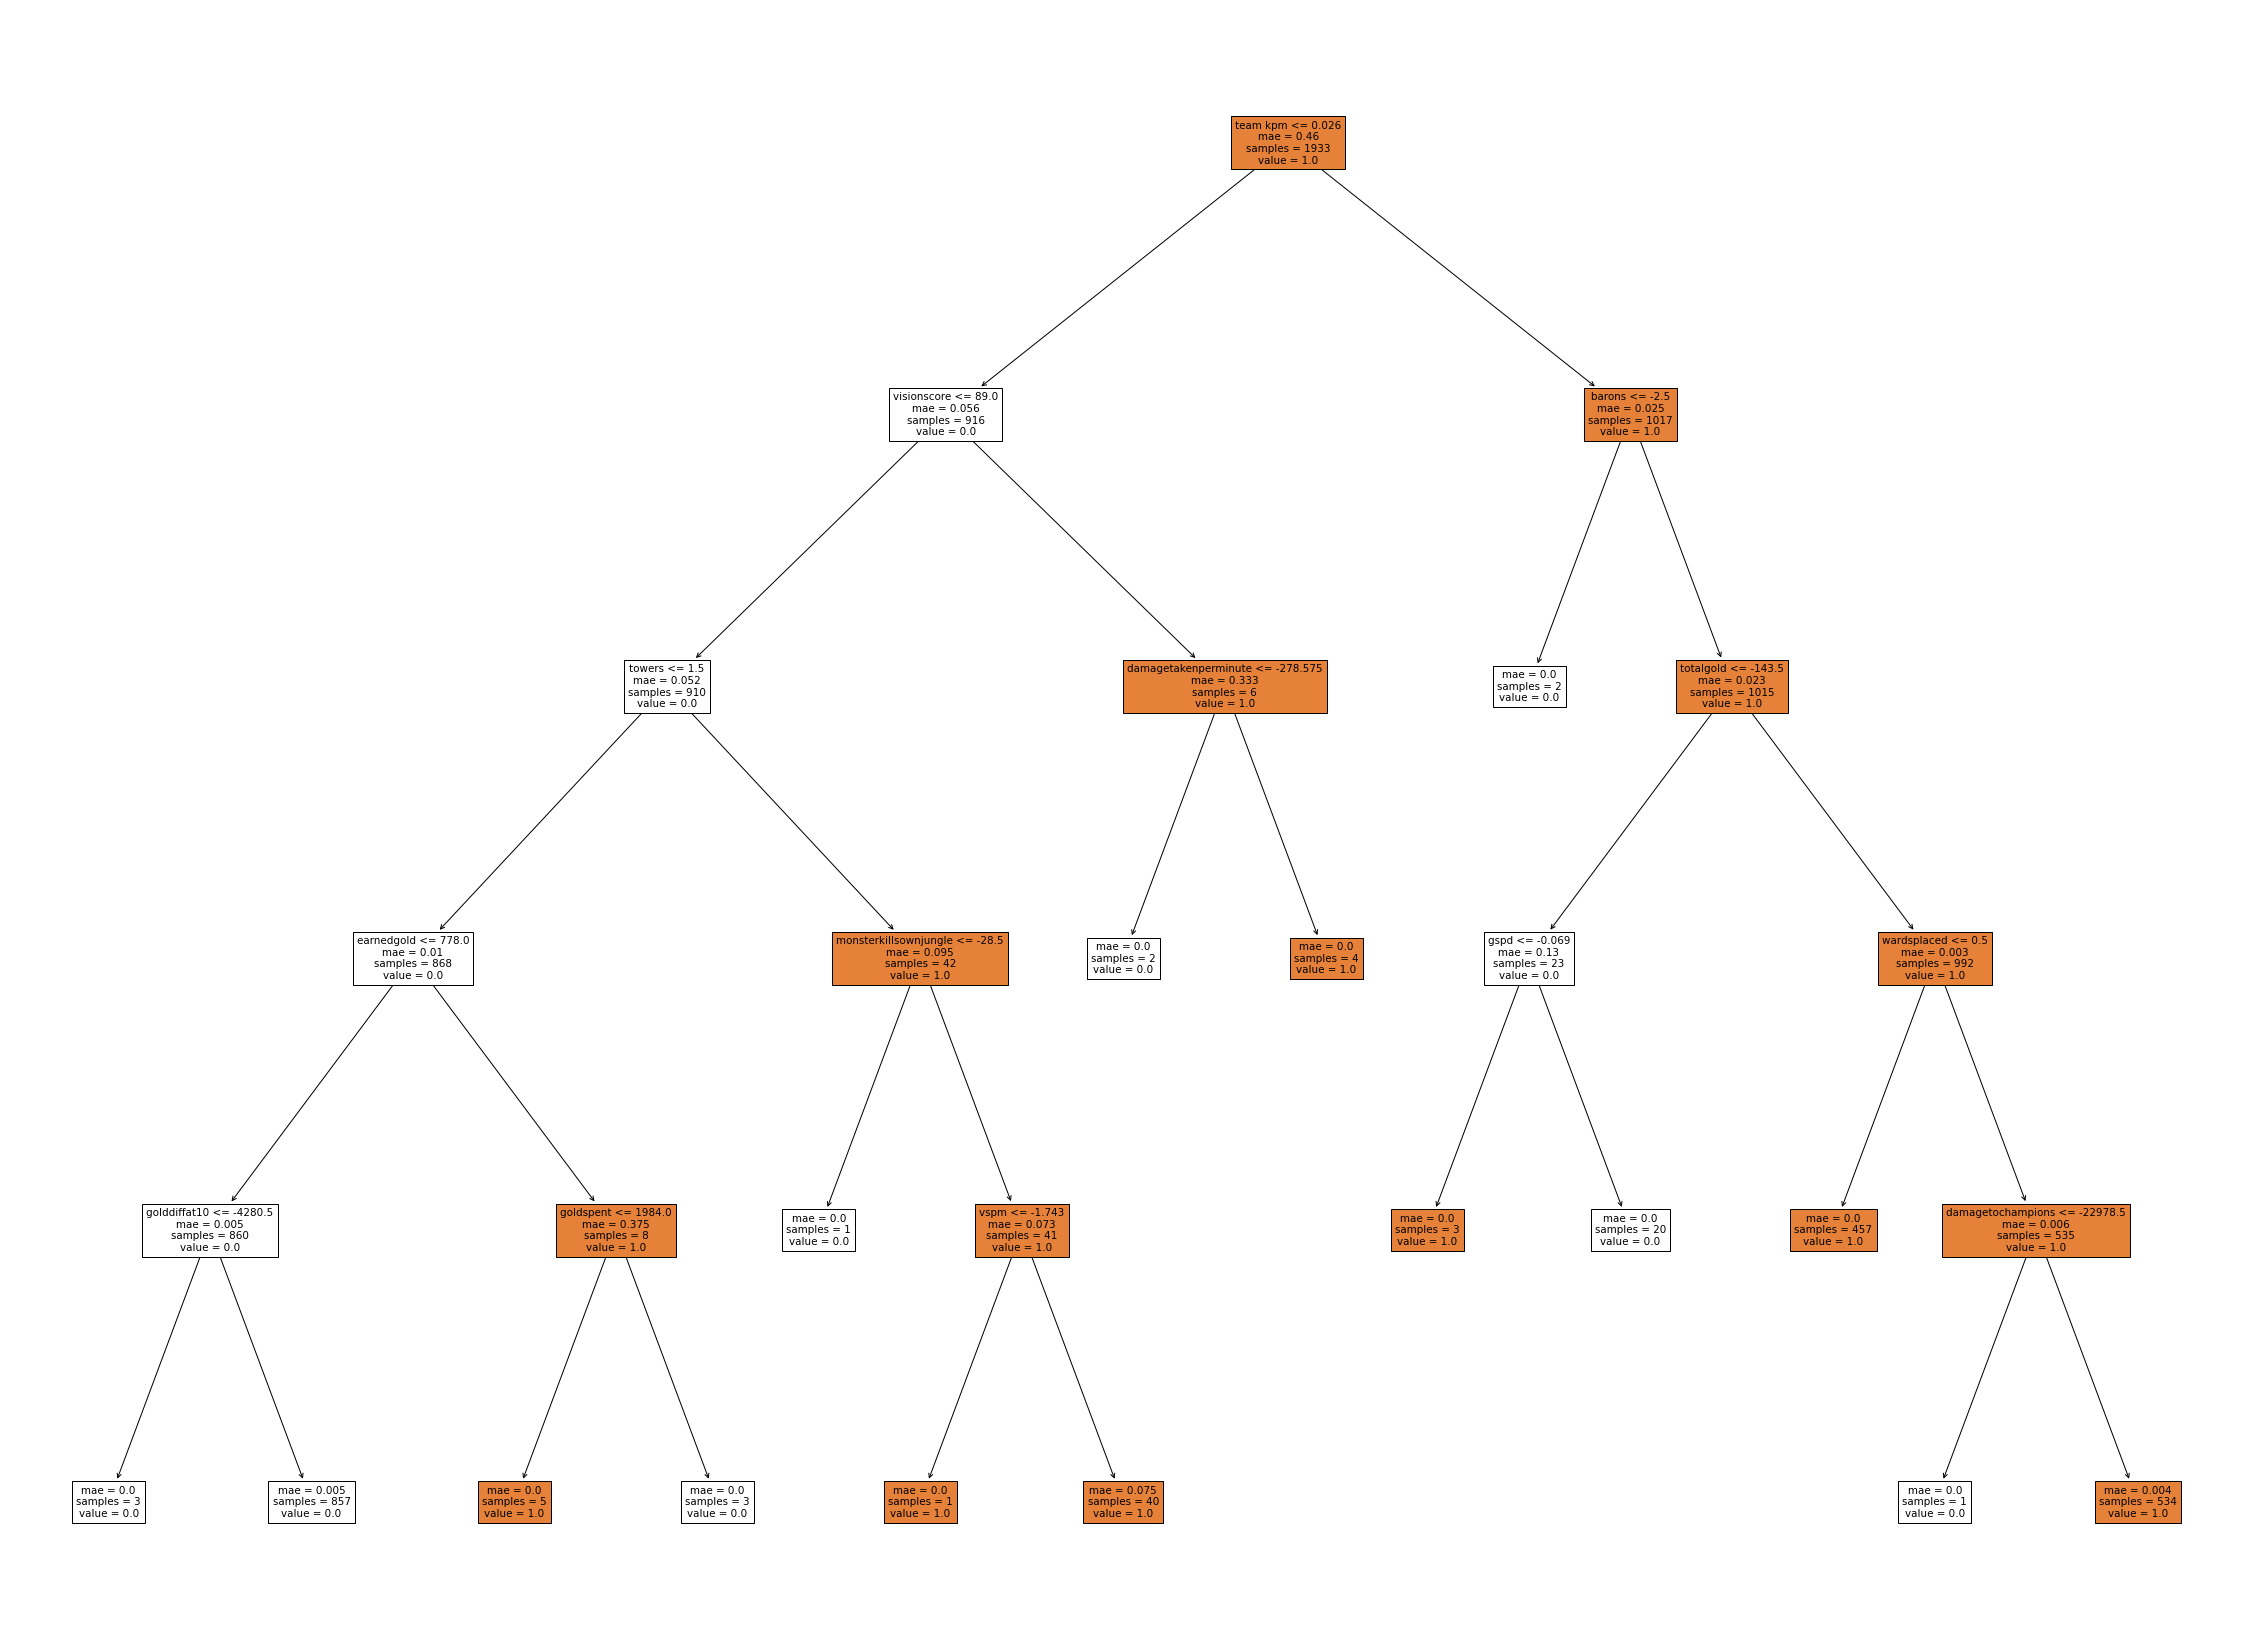

In [40]:
fig = plt.figure(figsize=(40,30))
_ = plot_tree(tree_reg, 
              feature_names=X.columns,  
              class_names='result',
              filled=True)

In [20]:
y.columns

AttributeError: 'Series' object has no attribute 'columns'

## Random Forest

### Classifier

In [251]:
rf_clf = RandomForestClassifier(n_estimators = 40, random_state = 42, max_depth=20)
rf_clf.fit(X, y);

In [252]:
rf_clf.score(worlds_X, worlds_y)

0.631578947368421

In [253]:
ypred_rf_clf = rf_clf.predict(worlds_X)
compare = pd.DataFrame({'Actual': worlds_y, 'Predicted': ypred_rf_clf.flatten()})
compare

,Actual,Predicted
0,1,1
1,0,0
2,0,1
3,1,1
4,1,0
5,0,0
6,0,0
7,0,0
8,1,0
9,0,0


In [254]:
ypred_rf_clf

array([1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 0], dtype=int64)

In [255]:
print("R2 Score test : %0.2f" % (rf_clf.score(worlds_X, worlds_y)))
ypred_rf_clf = rf_clf.predict(worlds_X)
print("Estimativas: %0.2f (+/- %0.2f)" % (ypred.mean(), ypred.std() * 2))
print("Absolute Error: %f " % (np.sum(abs(worlds_y - ypred_rf_clf))))
print("Mean absolute error: %0.2f" % (mean_absolute_error(worlds_y, ypred_rf_clf)))
print("Accuracy : %0.3f" % (aproximacao(worlds_y, ypred_rf_clf)))

R2 Score test : 0.63
Estimativas: 0.29 (+/- 0.91)
Absolute Error: 28.000000 
Mean absolute error: 0.37
Accuracy : 0.632


### Regressor

In [307]:
rf_rg = RandomForestRegressor(n_estimators = 40, random_state=42, max_depth=5, criterion='mae')
rf_rg.fit(X, y);

In [308]:
rf_rg.score(worlds_X, worlds_y)

-0.2473739495798326

In [309]:
ypred_rf_rg = rf_rg.predict(worlds_X)
compare = pd.DataFrame({'Actual': worlds_y, 'Predicted': ypred_rf_rg.flatten()})
compare

,Actual,Predicted
0,1,0.975
1,0,0.000
2,0,0.975
3,1,0.975
4,1,0.325
5,0,0.325
6,0,0.325
7,0,0.325
8,1,0.375
9,0,0.375


In [310]:
print("Score test : %0.2f" % (rf.score(worlds_X, worlds_y)))
ypred_rf_rg = rf_rg.predict(worlds_X)
print("Estimativas: %0.2f (+/- %0.2f)" % (ypred_rf_rg.mean(), ypred_rf_rg.std() * 2))
print("Absolute Error: %f " % (np.sum(abs(worlds_y - ypred_rf_rg))))
print("Mean absolute error: %0.2f" % (mean_absolute_error(worlds_y, ypred_rf_rg)))
print("Accuracy : %0.3f" % (aproximacao(worlds_y, ypred_rf_rg)))

Score test : -0.22
Estimativas: 0.42 (+/- 0.68)
Absolute Error: 33.050000 
Mean absolute error: 0.43
Accuracy : 0.632


## Simulação

In [ ]:
playoff = pd.read_csv("pipipipopopo.csv")

In [ ]:
#Dropa coluna dos nomes do time
playoff.drop(['team_x', 'team_y', 'gamelength'], axis=1, inplace=True)

playoff = pd.get_dummies(test, columns=['game'], prefix='game')